In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'wine'
shapes = {
    'S': (11,8,6),
    'V2': (6,),
    'V3': (5,),
    'V4': (4,)
}
epochs = 200
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([13], [3])


### S(X,X,X)

Average elapsed k-fold validation time: 178.00630 sec
Last measures: [0.19918029010295868, 0.30577126145362854, 0.2284453958272934, 0.2677863538265228, 0.23953677713871002, 0.23172909021377563, 0.1286320835351944, 0.3340775668621063, 0.2090856283903122, 0.2673787474632263, 0.12365027517080307, 0.19899079203605652, 0.20700591802597046, 0.2355174720287323, 0.33334529399871826, 0.06464690715074539, 0.1960694044828415, 0.3346311151981354, 0.3333333432674408, 0.33345353603363037, 0.3333333432674408, 0.24224978685379028, 0.02224848046898842, 0.3333333432674408, 0.3333333432674408, 0.3333333432674408, 0.2901918888092041, 0.21875673532485962, 0.2943418025970459, 0.33352169394493103]
Loss history average: [0.32261251 0.3215361  0.32059817 0.31969151 0.31880499 0.31792495
 0.31704116 0.31615352 0.31525879 0.31435415 0.31343254 0.31248863
 0.31151561 0.31050767 0.30946454 0.3083805  0.30724324 0.30604896
 0.30479812 0.30349407 0.30214547 0.30076536 0.2991443  0.29737142
 0.29553642 0.29368835 0.2

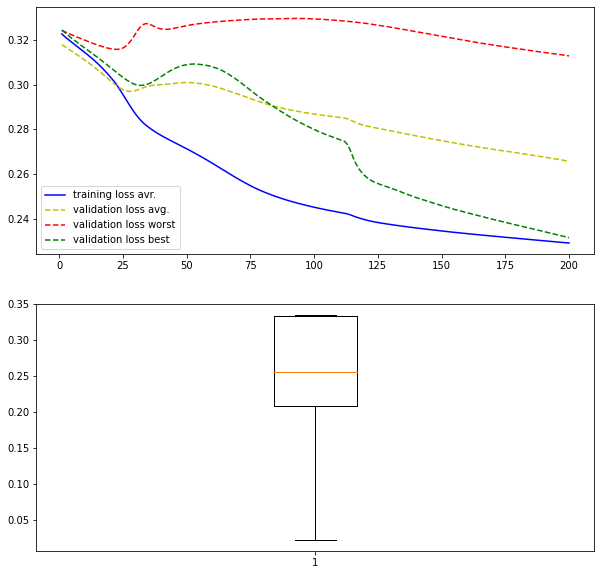

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 198.40136 sec
Last measures: [0.12423518300056458, 0.3333333432674408, 0.3383145332336426, 0.12953640520572662, 0.3353874683380127, 0.07039927691221237, 0.16488851606845856, 0.1408519148826599, 0.22899186611175537, 0.13958631455898285, 0.3335956335067749, 0.3335684537887573, 0.12752914428710938, 0.3334430456161499, 0.33346542716026306, 0.16097214818000793, 0.33344149589538574, 0.3333333432674408, 0.3333333432674408, 0.3333333432674408, 0.3343742787837982, 0.18557113409042358, 0.16870728135108948, 0.28693532943725586, 0.01662089116871357, 0.33472129702568054, 0.2913728952407837, 0.33342182636260986, 0.17106053233146667, 0.3369584381580353]
Loss history average: [0.32246292 0.32155336 0.32073545 0.3199398  0.31915876 0.31838843
 0.31762884 0.31687965 0.31613967 0.31540764 0.31468123 0.31395952
 0.31324255 0.31252996 0.31182148 0.31111759 0.31041862 0.30972382
 0.30903333 0.3083477  0.30766677 0.30699084 0.30632018 0.3056557
 0.30499801 0.30434658 0

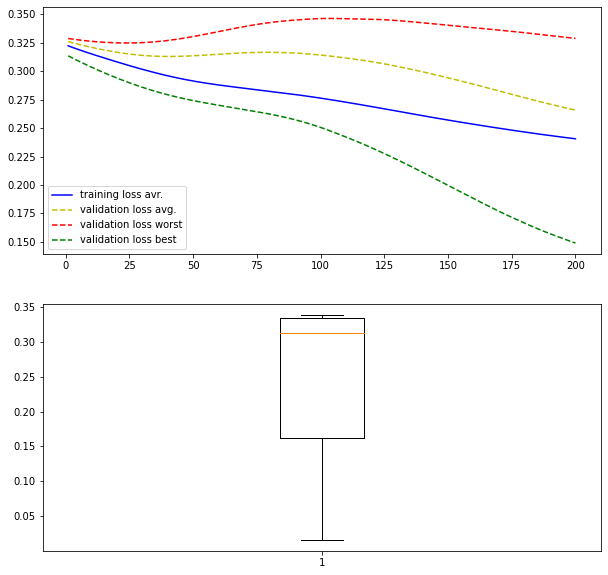

In [4]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 185.52883 sec
Last measures: [0.24938103556632996, 0.333335816860199, 0.2426542490720749, 0.23356451094150543, 0.2805227041244507, 0.2532535195350647, 0.2594500780105591, 0.2869311571121216, 0.3333333432674408, 0.2777104377746582, 0.3377307653427124, 0.16591233015060425, 0.3333333432674408, 0.3333333432674408, 0.33341455459594727, 0.334832102060318, 0.24087442457675934, 0.18532925844192505, 0.2306041717529297, 0.3333333432674408, 0.3047877848148346, 0.3333812952041626, 0.19398264586925507, 0.3333333432674408, 0.3334537744522095, 0.3333333432674408, 0.3333333432674408, 0.26717135310173035, 0.19965127110481262, 0.33478179574012756]
Loss history average: [0.32370501 0.32286676 0.32212498 0.32140406 0.3206958  0.32000005
 0.31931408 0.31863586 0.31796479 0.31730164 0.31664554 0.31599268
 0.31530682 0.31460772 0.31390624 0.31320666 0.31251031 0.31181343
 0.31103958 0.31021888 0.30938048 0.30848644 0.30757452 0.30666293
 0.30575798 0.30486127 0.3038951

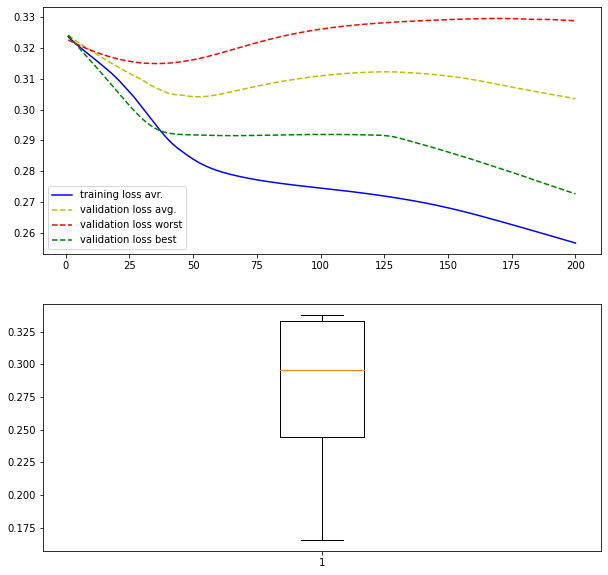

In [5]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 168.00070 sec
Last measures: [0.2712903618812561, 0.22587662935256958, 0.3333333432674408, 0.3335191011428833, 0.27780184149742126, 0.3335840404033661, 0.2537432014942169, 0.33553409576416016, 0.2890152931213379, 0.3339383602142334, 0.3333333432674408, 0.287697434425354, 0.3333333432674408, 0.1448395848274231, 0.0032911491580307484, 0.333392858505249, 0.21867075562477112, 0.14256726205348969, 0.23409639298915863, 0.33415961265563965, 0.33571237325668335, 0.16694679856300354, 0.3345508575439453, 0.24786376953125, 0.3333333432674408, 0.3352215886116028, 0.3333333432674408, 0.3334798812866211, 0.21303041279315948, 0.3333333432674408]
Loss history average: [0.32386938 0.32265793 0.32156848 0.32050461 0.31945874 0.31842705
 0.31740673 0.31639687 0.31539658 0.3144036  0.31341651 0.31243518
 0.31145899 0.31048733 0.30952033 0.30855716 0.3075973  0.30664061
 0.3056876  0.30473759 0.30379065 0.30284729 0.30190709 0.30096996
 0.30003627 0.29910631 0.298180

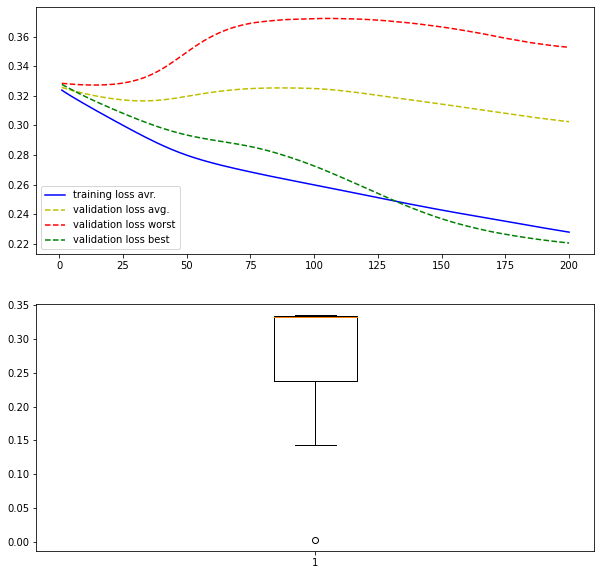

In [6]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 188.11527 sec
Last measures: [0.13665816187858582, 0.24273687601089478, 0.2670707404613495, 0.3333333432674408, 0.23225076496601105, 0.3333832025527954, 0.33307087421417236, 0.29309213161468506, 0.2251710295677185, 0.2803235650062561, 0.2999074459075928, 0.23378406465053558, 0.2782043218612671, 0.19772778451442719, 0.33641958236694336, 0.2998359203338623, 0.3333333432674408, 0.23226097226142883, 0.2381952553987503, 0.28568124771118164, 0.23323491215705872, 0.15947996079921722, 0.21826715767383575, 0.2230735719203949, 0.27733781933784485, 0.28886309266090393, 0.24864286184310913, 0.26874759793281555, 0.18214517831802368, 0.3342433571815491]
Loss history average: [0.31604538 0.31447304 0.3130665  0.31168139 0.31030407 0.30893011
 0.30755729 0.30618396 0.30480871 0.30343053 0.30204813 0.30066028
 0.29925967 0.29779522 0.29626676 0.29471588 0.29315225 0.29157909
 0.28999245 0.28829774 0.28654562 0.28476314 0.28294622 0.28099208
 0.27887885 0.27669229

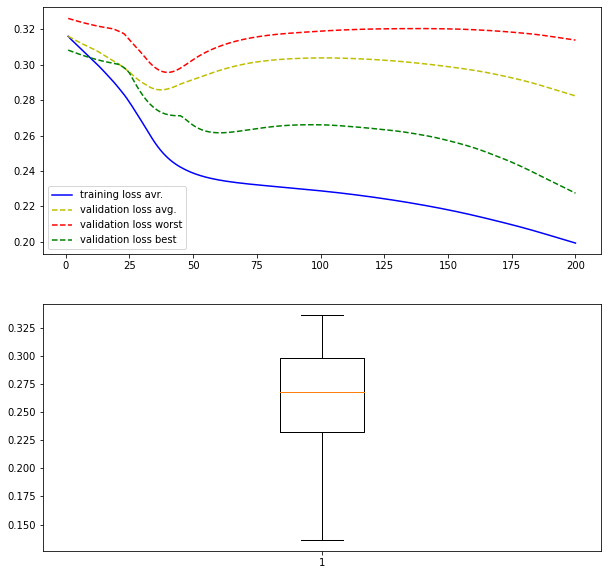

In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(4)

Average elapsed k-fold validation time: 170.35492 sec
Last measures: [0.07089822739362717, 0.2611769735813141, 0.3336752653121948, 0.22517894208431244, 0.015555093996226788, 0.3333333432674408, 0.07857222110033035, 0.3335185647010803, 0.19031451642513275, 0.3360840976238251, 0.3333333432674408, 0.11981095373630524, 0.17554771900177002, 0.1988629698753357, 0.023655300959944725, 0.2793452739715576, 0.117032490670681, 0.3333333432674408, 0.18153193593025208, 0.2583042085170746, 0.33333873748779297, 0.2516428530216217, 0.10876486450433731, 0.20742836594581604, 0.33400681614875793, 0.33366674184799194, 0.3333778381347656, 0.3340054750442505, 0.33589622378349304, 0.060517530888319016]
Loss history average: [0.3237428  0.32268412 0.3217381  0.32081775 0.31991457 0.31902576
 0.31814868 0.31728228 0.31642614 0.31557974 0.31474268 0.31391367
 0.31309234 0.3122792  0.31147251 0.31067281 0.30987985 0.30909199
 0.30830988 0.30753238 0.30675978 0.30599232 0.3052293  0.30447061
 0.30371631 0.30296666

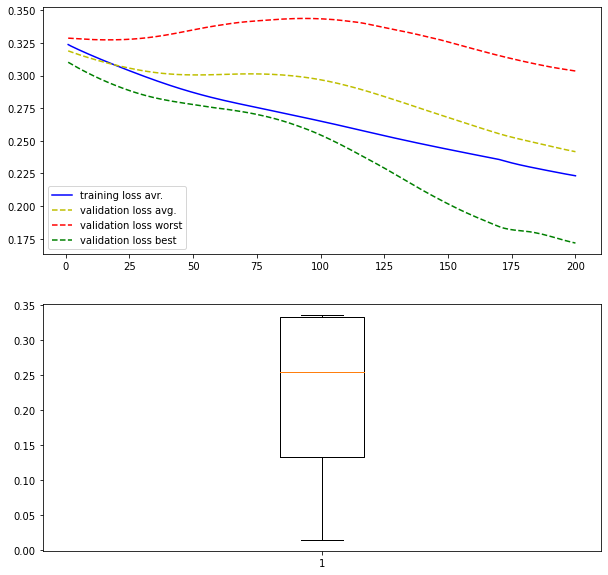

In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(4)

Average elapsed k-fold validation time: 187.39246 sec
Last measures: [0.25848013162612915, 0.2364412397146225, 0.22971844673156738, 0.3333333432674408, 0.2793791592121124, 0.2722773551940918, 0.23031097650527954, 0.18182985484600067, 0.1743248850107193, 0.012301405891776085, 0.259585440158844, 0.26662224531173706, 0.24435798823833466, 0.3333333432674408, 0.3333333432674408, 0.29650139808654785, 0.29176485538482666, 0.33530303835868835, 0.3041914701461792, 0.33486998081207275, 0.25587430596351624, 0.18516609072685242, 0.2505418360233307, 0.20107878744602203, 0.3349343240261078, 0.28265029191970825, 0.23119984567165375, 0.1781032532453537, 0.2655124366283417, 0.3163106143474579]
Loss history average: [0.31989288 0.31876144 0.31775734 0.31677735 0.31581173 0.31485683
 0.31391428 0.3129816  0.31205725 0.31113952 0.31022706 0.30931696
 0.3084055  0.307493   0.30654239 0.30556092 0.30456574 0.30356453
 0.30255938 0.301548   0.30052921 0.29950206 0.29846372 0.29735886
 0.29615424 0.29487419 0

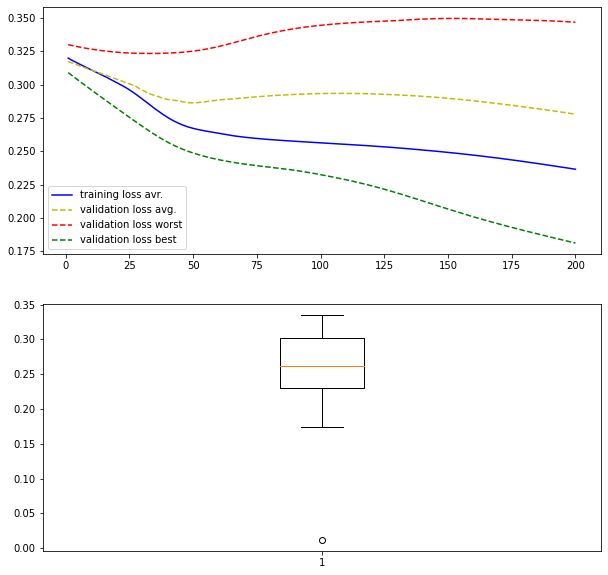

In [9]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)